<h1>Exploratory Data Analysis with SQL and Python

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating a Connection object to the database
conn = sqlite3.connect("../input/sf-salaries/database.sqlite")

In [3]:
#Function to display the query result as a dataframe
def query_result(query):
    cursor = conn.cursor()#creating a cursor object to run the query
    cursor.execute(query) #execute the query pass as an argument to this function
    df = pd.DataFrame(cursor.fetchall())#fetching the results (raw result is a list) and converting it to dataframe
    #SQLite query result doesn't return column names of table. So we get the column names from the description of cursor 
    df.columns = [col_name[0] for col_name in cursor.description]
    cursor.close()
    return df

<h2>Select all the records from the table Salaries

In [4]:
src = query_result("SELECT * FROM Salaries;")
src

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


Missing values are marked as 'Not Provided'. Almost every column has missing values

<a id="1"></a><h2>How many unique job titles are there?

In [5]:
query_result("SELECT COUNT(JobTitle) AS '#Job Titles', COUNT(DISTINCT JobTitle) AS '#Unique Job Titles' FROM Salaries;")

,#Job Titles,#Unique Job Titles
0,148654,2159


<a id="2"></a><h2>What are the unique job titles?</h2>

Printing only first 10.

In [6]:
" | ".join(list(query_result("SELECT DISTINCT JobTitle FROM Salaries ORDER BY JobTitle asc")['JobTitle'])[:10])

'ACCOUNT CLERK | ACCOUNTANT | ACCOUNTANT INTERN | ACPO,JuvP, Juv Prob (SFERS) | ACUPUNCTURIST | ADMINISTRATIVE ANALYST | ADMINISTRATIVE ANALYST II | ADMINISTRATIVE ANALYST III | ADMINISTRATIVE ENGINEER | ADMINISTRATIVE SERVICES MANAGER'

<a id="3"></a><h2>For which years is the data reported?

In [7]:
query_result("SELECT DISTINCT Year FROM Salaries;")

,Year
0,2011
1,2012
2,2013
3,2014


<a id="4"></a><h2>What's the yearly trend in the count of reported jobs?

   Year  Job Count
0  2011      36159
1  2012      36766
2  2013      37606
3  2014      38123


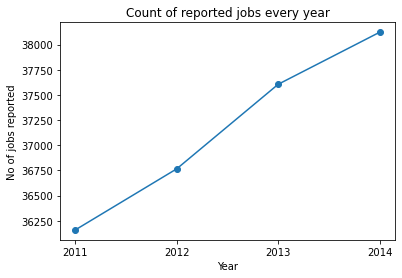

In [8]:
trend = query_result("SELECT Year,COUNT(*) AS 'Job Count' FROM Salaries GROUP BY Year ORDER BY Year")
print(trend)
trend.plot(x="Year",y="Job Count",legend=False,marker="o")
plt.title("Count of reported jobs every year")
plt.xticks(trend.Year)
plt.ylabel("No of jobs reported");

<a id="5"></a><h2>Are there any jobs related to data or machine learning?

In [9]:
# Finding job titles containing the words 'data' or 'machine'
query_result("SELECT * FROM Salaries WHERE LOWER(JobTitle) LIKE '%machine%' OR JobTitle LIKE '%data%' ORDER BY JobTitle;")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,21533,JACK FONG,OFFSET MACHINE OPERATOR,53694.1,2618.95,2490.30,,58803.33,58803.33,2011,,San Francisco,
1,23061,RONALD TURNER,OFFSET MACHINE OPERATOR,53692.6,0.00,763.00,,54455.63,54455.63,2011,,San Francisco,
2,23113,EDWARD DISPO,OFFSET MACHINE OPERATOR,53692.6,0.00,624.00,,54316.62,54316.62,2011,,San Francisco,
3,23114,LUIS GARCIA,OFFSET MACHINE OPERATOR,53692.6,0.00,624.00,,54316.61,54316.61,2011,,San Francisco,
4,23554,PHELAN FONG,OFFSET MACHINE OPERATOR,52785.2,0.00,613.80,,53399.05,53399.05,2011,,San Francisco,
5,57482,Jack Fong,Offset Machine Operator,57061,3668.51,624.00,29024.2,61353.51,90377.68,2012,,San Francisco,
6,58278,Ronald Turner,Offset Machine Operator,57061,0.00,1176.00,29361.1,58237.01,87598.12,2012,,San Francisco,
7,58508,Luis Garcia,Offset Machine Operator,57061,0.00,624.00,29118.9,57685.03,86803.91,2012,,San Francisco,
8,58644,Edward Dispo,Offset Machine Operator,57061,0.00,624.00,28665.5,57685.01,86350.47,2012,,San Francisco,
9,58708,Phelan Fong,Offset Machine Operator,57061,0.00,624.00,28497.1,57685.00,86182.12,2012,,San Francisco,


The only data related job found is 'Senior Data Entry Operator'

<a id="6"></a><h2>What's the trend in average Total Pay over years?

   Year  Avg_Tot_Pay
0  2011     71744.10
1  2012     74113.26
2  2013     77611.44
3  2014     75463.92


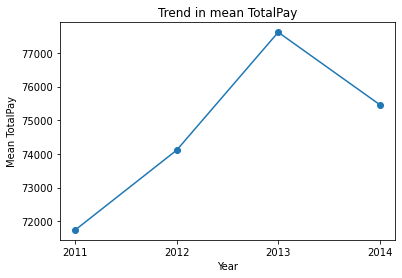

In [10]:
sal_trend = query_result("SELECT Year,ROUND(AVG(TotalPay),2) AS 'Avg_Tot_Pay' FROM Salaries GROUP BY Year;")
print(sal_trend)
sal_trend.plot(x='Year',y='Avg_Tot_Pay',legend=False,marker="o")
plt.title("Trend in mean TotalPay")
plt.xticks(sal_trend.Year)
plt.ylabel("Mean TotalPay");

<a id="7"></a><h2>What are the top 5 jobs in terms of mean TotalPay in the recent year (2014)?

In [11]:
query_result("SELECT JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) desc LIMIT 5")

,JobTitle,Avg_TotalPay
0,Chief Investment Officer,339653.70
1,Chief of Police,326716.76
2,"Chief, Fire Department",326233.44
3,"Gen Mgr, Public Trnsp Dept",294000.18
4,Dep Chf of Dept (Fire Dept),285575.79


<a id="8"></a><h2>What's the trend in Average TotalPay of the above 5 jobs?

    Year                     JobTitle  Avg_TotalPay
0   2012              Chief of Police     321552.11
1   2012       Chief, Fire Department     314759.60
2   2012   Gen Mgr, Public Trnsp Dept     294000.17
3   2012  Dep Chf of Dept (Fire Dept)     224253.94
4   2013              Chief of Police     339282.07
5   2013       Chief, Fire Department     336922.01
6   2013   Gen Mgr, Public Trnsp Dept     305307.89
7   2013  Dep Chf of Dept (Fire Dept)     292964.78
8   2014     Chief Investment Officer     339653.70
9   2014              Chief of Police     326716.76
10  2014       Chief, Fire Department     326233.44
11  2014   Gen Mgr, Public Trnsp Dept     294000.18
12  2014  Dep Chf of Dept (Fire Dept)     285575.79


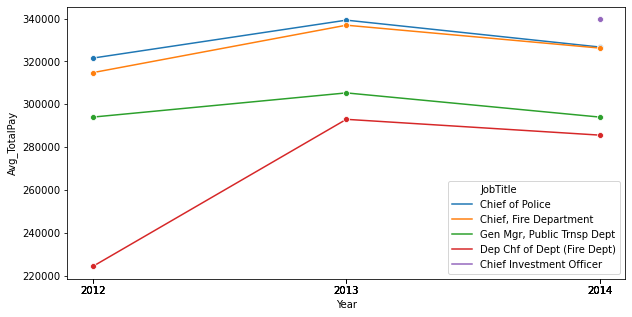

In [12]:
trend = query_result("""SELECT Year,JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE JobTitle IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) desc LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay) desc""")
print(trend)
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Avg_TotalPay",marker="o",data=trend,hue="JobTitle")
plt.xticks(trend.Year);

'Chief Investment Officer' has no previous salary history except for the year 2014. All the 5 jobs don't have data for 2011.

<a id="9"></a><h2>What are the bottom 5 jobs in terms of mean TotalPay in the recent year (2014)?

In [13]:
query_result("SELECT JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) asc LIMIT 5")

,JobTitle,Avg_TotalPay
0,"BdComm Mbr, Grp2,M=$25/Mtg",325.00
1,"BdComm Mbr, Grp3,M=$50/Mtg",726.50
2,Special Examiner,1141.17
3,"BdComm Mbr, Grp5,M$100/Mo",1300.12
4,Cashier 3,2074.60


<a id="10"></a><h2>What's the trend in Average TotalPay of the above 5 jobs?

    Year                    JobTitle  Avg_TotalPay
0   2012  BdComm Mbr, Grp2,M=$25/Mtg        263.19
1   2012  BdComm Mbr, Grp3,M=$50/Mtg        734.76
2   2012   BdComm Mbr, Grp5,M$100/Mo       1142.72
3   2012            Special Examiner       2373.52
4   2013  BdComm Mbr, Grp2,M=$25/Mtg        215.18
5   2013  BdComm Mbr, Grp3,M=$50/Mtg        735.13
6   2013            Special Examiner       1195.50
7   2013   BdComm Mbr, Grp5,M$100/Mo       1210.54
8   2014  BdComm Mbr, Grp2,M=$25/Mtg        325.00
9   2014  BdComm Mbr, Grp3,M=$50/Mtg        726.50
10  2014            Special Examiner       1141.17
11  2014   BdComm Mbr, Grp5,M$100/Mo       1300.12
12  2014                   Cashier 3       2074.60


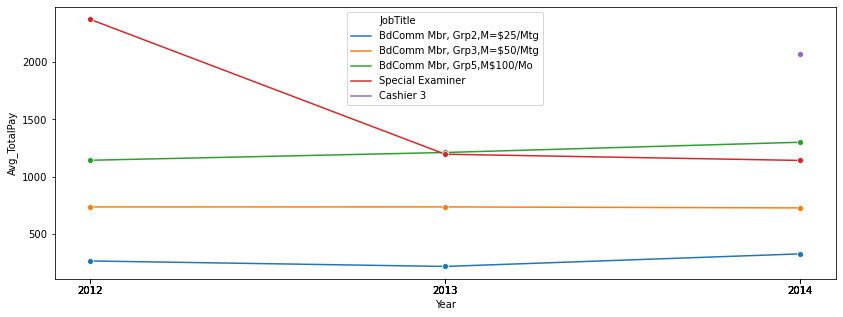

In [14]:
trend = query_result("""SELECT Year,JobTitle,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE TotalPay>0 AND JobTitle IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) asc LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay)""")
print(trend)
fig = plt.figure(figsize=(14,5))
sns.lineplot(x="Year",y="Avg_TotalPay",marker="o",data=trend,hue="JobTitle")
plt.xticks(trend.Year);

'Cashier 3' has no previous salary history except for the year 2014

<a id="11"></a><h2>Which employee earned the most in terms of TotalPay by Year?

In [15]:
query_result("SELECT Year,EmployeeName,JobTitle,MAX(TotalPay) FROM Salaries GROUP BY Year")

,Year,EmployeeName,JobTitle,MAX(TotalPay)
0,2011,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,2012,Gary Altenberg,"Lieutenant, Fire Suppression",362844.66
2,2013,Samson Lai,"Battalion Chief, Fire Suppress",347102.32
3,2014,David Shinn,Deputy Chief 3,471952.64


<a id="12"></a><h2>Which employee earned the least in terms of TotalPay by Year?

In [16]:
query_result("SELECT Year,EmployeeName,JobTitle,MIN(TotalPay) FROM Salaries WHERE TotalPay>0 GROUP BY Year")

,Year,EmployeeName,JobTitle,MIN(TotalPay)
0,2011,JOE BROWN JR,TRANSIT OPERATOR,0.30
1,2012,Donald Clark,Transit Operator,1.77
2,2013,Nereida Vega,Senior Clerk,5.56
3,2014,Sylvia R Jones,Child Support Officer II,1.83


<a id="13"></a><h2>Is there any pattern in salaries of Junior, Senior, and Chief employee titles?

     junior    senior      chief
0  27340.15  74463.22  168134.11


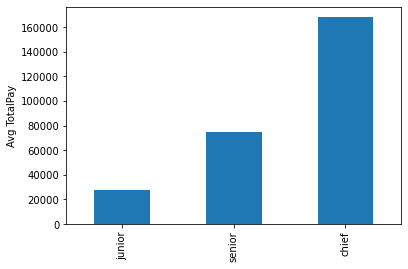

In [17]:
title = ["junior","senior","chief"]
for i,ti in enumerate(title):
    if i==0:
        title_sal = query_result(f"SELECT ROUND(AVG(TotalPay),2) as {ti} FROM Salaries WHERE TotalPay>0 AND LOWER(JobTitle) LIKE '%{ti}%'")
    else:
        title_sal[ti] = query_result(f"SELECT ROUND(AVG(TotalPay),2) as {ti} FROM Salaries WHERE TotalPay>0 AND LOWER(JobTitle) LIKE '%{ti}%'")
print(title_sal)
title_sal.T.plot(kind="bar",legend=False)
plt.ylabel("Avg TotalPay");

Employees with 'Junior' in their titles have the least average TotalPay followed by 'Senior' with 'Chief' being the highest.

<h3>The above query can be performed directly using SQL as shown below.

    Title  Avg_TotalPay
0  junior      27340.15
1  senior      74463.22
3   chief     168134.11


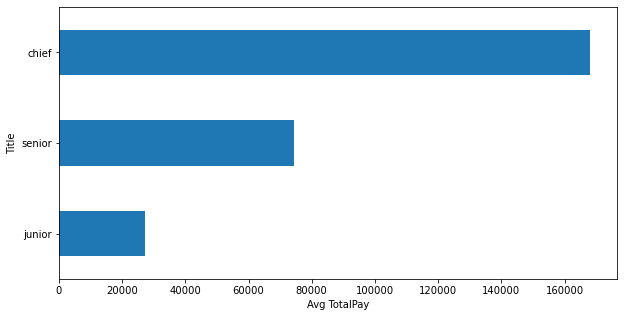

In [18]:
title = query_result("""SELECT CASE WHEN LOWER(JobTitle) LIKE '%junior%' THEN 'junior' 
             WHEN LOWER(JobTitle) LIKE '%senior%' THEN 'senior' 
             WHEN LOWER(JobTitle) LIKE '%chief%' THEN 'chief' 
             ELSE 'others' END 
             AS Title,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE TotalPay>0 GROUP BY Title ORDER BY AVG(TotalPay)""")
title = title.loc[title["Title"]!="others",:].copy()
print(title)
title.plot(kind="barh",x="Title",y="Avg_TotalPay",legend=False,figsize=(10,5))
plt.xlabel("Avg TotalPay");

<a id="14"></a><h2>Is there any correlation between various pay components?

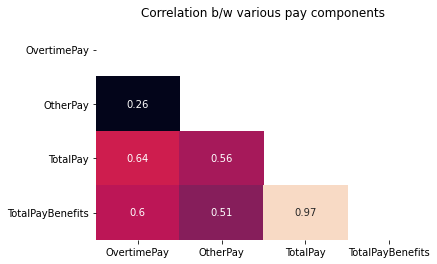

In [19]:
pay_df = query_result("""SELECT OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits FROM Salaries WHERE 
OvertimePay>0 AND OtherPay>0 AND Benefits>0 AND TotalPay>0 AND TotalPayBenefits>0 AND 
OvertimePay!='Not Provided' AND OtherPay!='Not Provided' AND Benefits!='Not Provided' AND TotalPay!='Not Provided' AND TotalPayBenefits!='Not Provided'""")
sns.heatmap(pay_df.corr(),annot=True,mask=np.triu(pay_df.corr()),cbar=False)
plt.title("Correlation b/w various pay components");

We can see a moderate to strong positive correlation amongst various pay components

<a id="15"></a><h2>Who are the employees with TotalPay between 500,000 and 1,000,000?

In [20]:
query_result("SELECT * FROM Salaries WHERE TotalPay BETWEEN 500000 AND 1000000")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,


<a id="16"></a><h2>Who were on a single job all the 4 years?</h2>

<h3>This query gets complicated in SQL. Hence, we'll implement it in Python

In [21]:
pd.set_option("display.min_rows",200)
df = query_result("SELECT * FROM Salaries")
df.drop_duplicates(inplace=True)

df["EmployeeName"] = df["EmployeeName"].str.lower()
df["JobTitle"] = df["JobTitle"].str.lower()


df["EmployeeName"]=df["EmployeeName"].str.replace("  "," ",regex=False)
df["JobTitle"]=df["JobTitle"].str.replace("  "," ",regex=False)


tot_yrs = df[["EmployeeName","Year"]].drop_duplicates().groupby("EmployeeName").count().reset_index().copy()
tot_yrs.columns = ["EmployeeName","year_count"]
tot_yrs.sort_values(by="year_count",ascending=False,inplace=True)
tot_yrs.drop_duplicates("EmployeeName",inplace=True)

df=df.merge(tot_yrs,on="EmployeeName",how="left").copy()

df["EmployeeName"] = df["EmployeeName"].replace("not provided",np.nan)
df["JobTitle"] = df["JobTitle"].replace("not provided",np.nan)

df.dropna(inplace=True)

tot_jobs = df[["EmployeeName","JobTitle","Year"]].groupby(["EmployeeName","JobTitle"]).count().reset_index().copy()
tot_jobs.drop(columns="JobTitle",inplace=True)
tot_jobs.columns = ["EmployeeName","job_count"]
tot_jobs.sort_values(by="job_count",ascending=False,inplace=True)
tot_jobs.drop_duplicates("EmployeeName",inplace=True)


df = df.merge(tot_jobs,on=["EmployeeName"],how="left").copy()

sol = df.loc[(df["year_count"]==df["job_count"]) & (df["year_count"]==4),:].copy()
sol.sort_values(["EmployeeName","Year"]).reset_index(drop=True)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,year_count,job_count
0,29354,a bernard fatooh,sheriff's property keeper,19969.4,0,70.54,,20039.91,20039.91,2011,,San Francisco,,4,4
1,66372,a bernard fatooh,sheriff's property keeper,18472.3,0,27.84,5014.66,18500.19,23514.85,2012,,San Francisco,,4,4
2,102844,a bernard fatooh,sheriff's property keeper,23908.5,0,15.12,5455.62,23923.62,29379.24,2013,,San Francisco,,4,4
3,140526,a bernard fatooh,sheriff's property keeper,24061.3,0,0,6091.68,24061.35,30153.03,2014,,San Francisco,PT,4,4
4,611,abdul khadir,"captain, fire suppression",140547,24805.9,16826.9,,182179.62,182179.62,2011,,San Francisco,,4,4
5,37183,abdul khadir,"captain, fire suppression",147070,14986.3,18383.7,45784.9,180439.75,226224.68,2012,,San Francisco,,4,4
6,73932,abdul khadir,"captain, fire suppression",153764,11814.4,20490,49399,186068.30,235467.31,2013,,San Francisco,,4,4
7,111309,abdul khadir,"captain, fire suppression",148121,21572.8,20743.9,52011.6,190437.81,242449.45,2014,,San Francisco,FT,4,4
8,7882,abraham abarca,registered nurse,99610.1,2986.81,5326.05,,107922.97,107922.97,2011,,San Francisco,,4,4
9,42739,abraham abarca,registered nurse,106901,3177.97,4201.18,45708.8,114280.11,159988.93,2012,,San Francisco,,4,4


<a id="17"></a><h2>Who changed the job every year across all the 4 years?</h2>

In [22]:
sol = df.loc[(df["year_count"]==4) & (df["job_count"]==1),:].copy()
sol.sort_values(["EmployeeName","Year"]).reset_index(drop=True)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,year_count,job_count
0,28000,alan nguyen,is administrator i,30105.7,0,0,,30105.70,30105.70,2011,,San Francisco,,4,1
1,58968,alan nguyen,is administrator 1,57146.8,0,0,28245.8,57146.81,85392.56,2012,,San Francisco,,4,1
2,94429,alan nguyen,it operations support admin ii,64305,0,0,27090.2,64305.00,91395.16,2013,,San Francisco,,4,1
3,130546,alan nguyen,is programmer analyst,67898,0,0,29389,67898.01,97286.96,2014,,San Francisco,FT,4,1
4,8403,anthony ababon,principal administrative analyst,105489,0,0,,105489.00,105489.00,2011,,San Francisco,,4,1
5,44082,anthony ababon,pr administrative analyst,107926,0,0,42379.2,107926.00,150305.16,2012,,San Francisco,,4,1
6,80820,anthony ababon,prnpl admin analyst ii,116706,0,0,36355.9,116705.51,153061.44,2013,,San Francisco,,4,1
7,116984,anthony ababon,mayoral staff xi,124354,0,0,40419.6,124353.53,164773.15,2014,,San Francisco,FT,4,1
8,30057,calman chin,cashier i,15795.1,296.25,0,,16091.31,16091.31,2011,,San Francisco,,4,1
9,61977,calman chin,cashier 1,43905.8,1097.98,0,25401.8,45003.77,70405.62,2012,,San Francisco,,4,1


<a id="18"></a><h2>Who changed job atleast once in 4 years?

In [23]:
sol = df.loc[(df["year_count"]==4) & (df["job_count"]<4),:].copy()
sol.sort_values(["EmployeeName","Year"]).reset_index(drop=True)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,year_count,job_count
0,12349,aaron brinkerhoff,biologist i/ii,87619.1,0,0,,87619.12,87619.12,2011,,San Francisco,,4,2
1,48002,aaron brinkerhoff,biologist i/ii,89522.1,0,0,38205.6,89522.11,127727.66,2012,,San Francisco,,4,2
2,83181,aaron brinkerhoff,biologist iii,103611,0,0,34329.8,103611.48,137941.28,2013,,San Francisco,,4,2
3,119532,aaron brinkerhoff,biologist iii,108374,0,574.73,37417.8,108948.78,146366.54,2014,,San Francisco,FT,4,2
4,4742,aaron fischer,police officer iii,111601,8496.85,5899.46,,125997.71,125997.71,2011,,San Francisco,,4,3
5,42067,aaron fischer,police officer 3,117171,9394.03,3216.67,34498.8,129782.15,164280.93,2012,,San Francisco,,4,3
6,78353,aaron fischer,police officer 3,123471,9399.69,3205.45,37025.2,136076.27,173101.45,2013,,San Francisco,,4,3
7,114265,aaron fischer,police officer 3,118898,13431.5,16574.3,38839.6,148903.92,187743.55,2014,,San Francisco,FT,4,3
8,17293,aaron golbus,wharfinger ii,70584.8,0,0,,70584.83,70584.83,2011,,San Francisco,,4,3
9,51577,aaron golbus,wharfinger 2,78365.5,0,0,33668.3,78365.51,112033.81,2012,,San Francisco,,4,3


<a id="19"></a><h2>How does the mean TotalPay vary between Full time and Part time job?</h2>
Full time: Status = FT<br>
Part time: Status = PT

  Status  AVG(TotalPay)
0     FT  103505.761053
1     PT   35806.986627


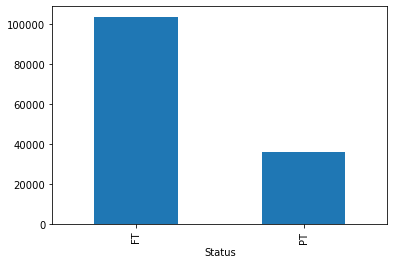

In [24]:
stt = query_result("SELECT Status,AVG(TotalPay) FROM Salaries WHERE Status IN ('FT','PT') GROUP BY Status")
print(stt)
stt.plot(kind="bar",x='Status',y='AVG(TotalPay)',legend=False);